Loading required package: SeuratObject

Loading required package: sp


Attaching package: ‘SeuratObject’


The following objects are masked from ‘package:base’:

    intersect, t




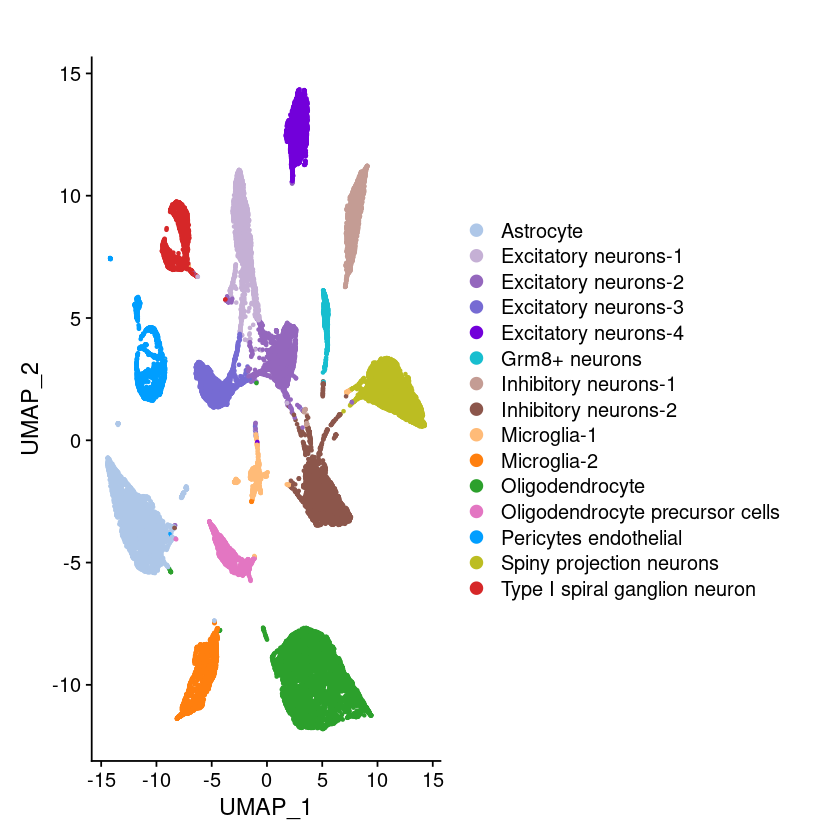

In [ ]:
library(ggplot2)
library(Seurat)

load("Seurat_Anno.RData")

colors <- c("Astrocyte" = "#AEC7E8",
            "Excitatory neurons-1" = "#C5B0D5",
            "Excitatory neurons-2" = "#9467BD",
            "Excitatory neurons-3" = "#766bd3",
            "Excitatory neurons-4" = "#7200DA",
            "Grm8+ neurons" = "#17BECF",
            "Inhibitory neurons-1" = "#C49C94",
            "Inhibitory neurons-2" = "#8C564B",
            "Microglia-1" = "#FFBB78",
            "Microglia-2" = "#FF7F0E",
            "Oligodendrocyte" = "#2CA02C",
            "Oligodendrocyte precursor cells" = "#E376C2",
            "Pericytes endothelial" = "#009eff",
            "Spiny projection neurons" = "#BCBD22",
            "Type I spiral ganglion neuron" = "#D62728")

DimPlot(
  object = obj,
  group.by = 'subtype',
  label = F,
  cols = colors,
  pt.size = 0.5,
  label.size = 4,
  repel = TRUE) + ggtitle('')

In [ ]:
library(ArchR)

options(repr.plot.width=12, repr.plot.height=8)

# fig h i
markersPeaks_proj <- getMarkerFeatures(
  ArchRProj = proj_sub, 
  useMatrix = "PeakMatrix", 
  groupBy = "celltype_New",
  bias = c("TSSEnrichment", "log10(nFrags)"),
  testMethod = "wilcoxon"
)

heatmapPeaks <- plotMarkerHeatmap(
  seMarker = markersPeaks_proj, 
  cutOff = "FDR <= 0.1 & Log2FC >= 0.5",
  transpose = TRUE
)

plotPDF(heatmapPeaks, 
        name = "fig6hi_Peak-Marker-Heatmap.pdf", 
        width = 8, height = 6, 
        ArchRProj = proj_sub, addDOC = FALSE, verbose = TRUE)

print("=== Peak Marker Heatmap ===")
options(repr.plot.width=8, repr.plot.height=6)
heatmapPeaks


markerList_sub <- getMarkers(markersPeaks_proj, cutOff = "FDR <= 0.01 & Log2FC >= 0.25")
print(markerList_sub)

proj_sub <- addMotifAnnotations(ArchRProj = proj_sub, motifSet = "cisbp", name = "Motif", force = TRUE)

enrichMotifs_sub <- peakAnnoEnrichment(
  seMarker = markersPeaks_proj,
  ArchRProj = proj_sub,
  peakAnnotation = "Motif",
  cutOff = "FDR <= 0.1 & Log2FC >= 0.25"
)

custom_pal <- colorRampPalette(c("#eeeeee", "#FF7F0E"))(100)
heatmapEM <- plotEnrichHeatmap(enrichMotifs_sub, n = 18, pal = custom_pal, transpose = TRUE)

pdf("Motifs-Enriched-Marker-Heatmap.pdf", width = 24, height = 6)
heatmapEM
dev.off()

plotPDF(heatmapEM, name = "fig6_hi_Motifs-Enriched-Marker-Heatmap.pdf", 
        width = 24, height = 6, ArchRProj = proj_sub, addDOC = FALSE)

print("=== Motif Enrichment Heatmap (n=18) ===")
options(repr.plot.width=24, repr.plot.height=6)
heatmapEM


custom_pal <- colorRampPalette(c("#eeeeee", "#FF7F0E"))(100)
heatmapEM_n10 <- plotEnrichHeatmap(enrichMotifs_sub, n = 10, pal = custom_pal, transpose = TRUE)

pdf("Motifs-Enriched-Marker-Heatmap_n10.pdf", width = 20, height = 6)
heatmapEM_n10
dev.off()

plotPDF(heatmapEM_n10, name = "fig6i_Motifs-Enriched-Marker-Heatmap_n10.pdf", 
        width = 12, height = 6, ArchRProj = proj_sub, addDOC = FALSE)

print("=== Motif Enrichment Heatmap (n=10) ===")
options(repr.plot.width=20, repr.plot.height=6)
heatmapEM_n10


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

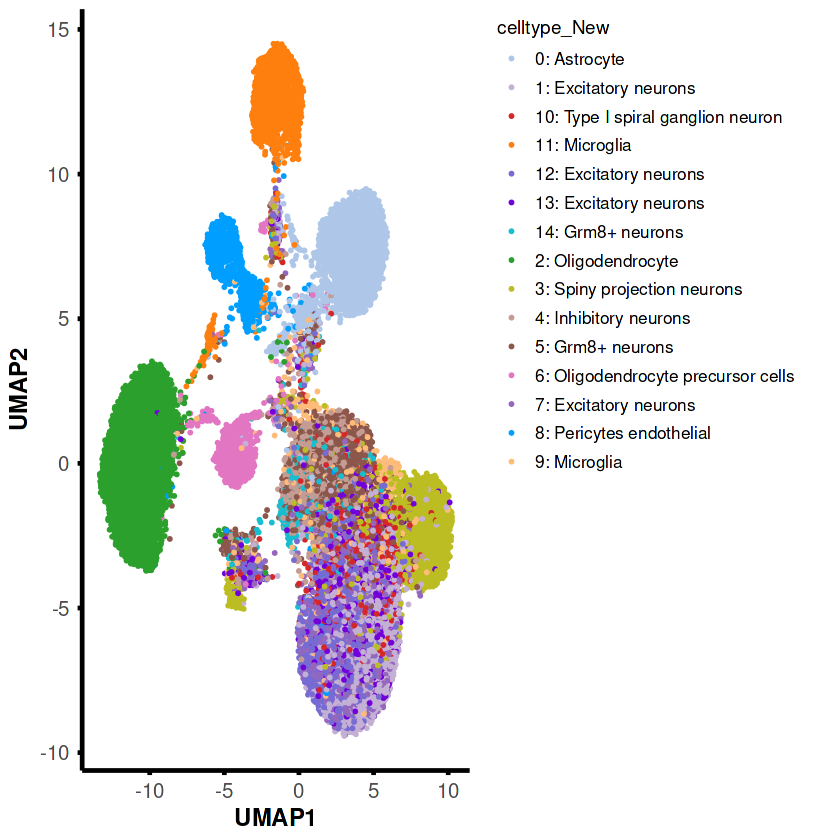

In [ ]:

# fig6 f -----
library(ArchR)
proj_sub <- readRDS("proj_sub_2025_03_21_12h.rds")
umap_coords <- getEmbedding(proj_sub, embedding = "UMAP")

cell_types <- getCellColData(proj_sub, select = "celltype_New")

plot_data <- data.frame(
  UMAP1 = umap_coords[, 1],
  UMAP2 = umap_coords[, 2],
  cellType = cell_types
)

col <- c("0: Astrocyte" = "#AEC7E8"
         ,"1: Excitatory neurons" = "#766bd3"
         ,"2: Oligodendrocyte" = "#2CA02C"
         ,"3: Spiny projection neurons" = "#BCBD22"
         ,"4: Inhibitory neurons" = "#C49C94"
         ,"5: Grm8+ neurons" = "#17BECF"
         ,"6: Oligodendrocyte precursor cells" = "#E376C2"
         ,"7: Excitatory neurons" = "#766bd3"
         ,"8: Pericytes endothelial" = "#009eff"
         ,"9: Microglia" = "#F7B778"
         ,"10: Type I spiral ganglion neuron" = "#D62728"
         ,"11: Microglia" = "#F7B778"
         ,"12: Excitatory neurons" = "#766bd3"
         ,"13: Excitatory neurons" = "#766bd3"
         ,"14: Grm8+ neurons"  = "#17BECF")


col <- c("0: Astrocyte" = "#AEC7E8"
         ,"1: Excitatory neurons" = "#C5B0D5"
         ,"2: Oligodendrocyte" = "#2CA02C"
         ,"3: Spiny projection neurons" = "#BCBD22"
         ,"4: Inhibitory neurons" = "#C49C94"
         ,"5: Grm8+ neurons" = "#8C564B"
         ,"6: Oligodendrocyte precursor cells" = "#E376C2"
         ,"7: Excitatory neurons" = "#9467BD"
         ,"8: Pericytes endothelial" = "#009eff"
         ,"9: Microglia" = "#FFBB78"
         ,"10: Type I spiral ganglion neuron" = "#D62728"
         ,"11: Microglia" = "#FF7F0E"
         ,"12: Excitatory neurons" = "#766bd3"
         ,"13: Excitatory neurons" = "#7200DA"
         ,"14: Grm8+ neurons"  = "#17BECF")

colors <- c("Astrocyte" = "#AEC7E8",
            "Excitatory neurons-1" = "#C5B0D5",
            "Excitatory neurons-2" = "#9467BD",
            "Excitatory neurons-3" = "#766bd3",
            "Excitatory neurons-4" = "#7200DA",
            "Grm8+ neurons" = "#17BECF",
            "Inhibitory neurons-1" = "#C49C94",
            "Inhibitory neurons-2" = "#8C564B",
            "Microglia-1" = "#FFBB78",
            "Microglia-2" = "#FF7F0E",
            "Oligodendrocyte" = "#2CA02C",
            "Oligodendrocyte precursor cells" = "#E376C2",
            "Pericytes endothelial" = "#009eff",
            "Spiny projection neurons" = "#BCBD22",
            "Type I spiral ganglion neuron" = "#D62728")


pt <- ggplot(plot_data, aes(x = UMAP1, y = UMAP2, color = celltype_New)) +
  geom_point(size = 0.6) +
  theme_minimal() +
  scale_color_manual(values = col) +
  labs(x = "UMAP1", y = "UMAP2")+
  theme(
    panel.grid = element_blank(),
    panel.border = element_blank(),
    axis.ticks = element_line(color = "black",linewidth = 1),
    axis.line = element_line(color = "black",linewidth = 1), 
    legend.position = 'right',
    legend.justification = c(0, 1),
    axis.title = element_text(size = 14, face = "bold"), 
    axis.text = element_text(size = 12),
    legend.text = element_text(size = 10)
  )
pt
# ggsave("aer/fig6f-2.pdf", plot = pt, width = 7.5, height = 4.5)

